<a href="https://colab.research.google.com/github/ferdiansya1805-bit/Implementasi-Database-Analisis-Penjualan-Komprehensif/blob/main/Analisis_Penjualan_Kuliner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy

# Task
Lakukan analisis data untuk wawasan bisnis yang mendalam dan memvisualisasikan performa penjualan dari file data yang ada di Google Drive.

## Hubungkan google drive

### Subtask:
Sambungkan Google Drive Anda untuk mengakses file data.


**Reasoning**:
Mount Google Drive to access the data file.



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import os

# Define the path to the directory containing the CSV files in Google Drive
# If the files are directly in 'My Drive', use '/content/drive/MyDrive/'
folder_path = '/content/drive/MyDrive/'

# Define the names of the remaining CSV files
file_names = ['Pelanggan.csv', 'Perusahaan.csv', 'Produk.csv', 'Transaksi.csv']

# Create an empty dictionary to store the DataFrames if it doesn't exist
if 'dataframes' not in globals():
    dataframes = {}

# Loop through the file names and load each one into a DataFrame
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    try:
        df_name = file_name.replace('.csv', '') # Create a DataFrame name without the .csv extension
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Successfully loaded {file_name} into DataFrame '{df_name}'")
        display(dataframes[df_name].head()) # Display the head of each loaded DataFrame
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except Exception as e:
        print(f"An error occurred while loading {file_name}: {e}")

# You can access the DataFrames using the dictionary, e.g., dataframes['Perusahaan'], dataframes['Transaksi'] etc.

Successfully loaded Pelanggan.csv into DataFrame 'Pelanggan'


,id_pelanggan,nama,jenis_kelamin,tanggal_lahir,alamat,kota,telepon,email
0,1,Customer 1,Lainnya,1981-06-07,Jl. Pelanggan No. 271,Denpasar,82237386857,user1@email.com
1,2,Customer 2,Perempuan,1948-04-16,Jl. Pelanggan No. 25,Medan,82963288053,user2@email.com
2,3,Customer 3,Laki-laki,1996-12-07,Jl. Pelanggan No. 256,Jakarta,83469810046,user3@email.com
3,4,Customer 4,Lainnya,1949-10-08,Jl. Pelanggan No. 150,Denpasar,89596653373,user4@email.com
4,5,Customer 5,Perempuan,1956-05-15,Jl. Pelanggan No. 293,Denpasar,83869961166,user5@email.com


Successfully loaded Perusahaan.csv into DataFrame 'Perusahaan'


,id_perusahaan,nama_perusahaan,alamat,kota,provinsi,kode_pos,telepon,email,tanggal_berdiri,jumlah_karyawan,jenis_usaha
0,1,Perusahaan Kuliner 1,Jl. Raya No. 58,Jakarta,DKI Jakarta,13278,8796233790,contact1@kuliner.com,1999-05-11,130,Restoran
1,2,Perusahaan Kuliner 2,Jl. Raya No. 115,Bandung,Jawa Barat,28289,8790779946,contact2@kuliner.com,1993-06-27,351,Katering
2,3,Perusahaan Kuliner 3,Jl. Raya No. 280,Surabaya,Jawa Timur,21395,8634036506,contact3@kuliner.com,2004-05-10,21,Kafe
3,4,Perusahaan Kuliner 4,Jl. Raya No. 16,Medan,Sumatera Utara,22280,8234760738,contact4@kuliner.com,1997-12-01,263,Food Truck
4,5,Perusahaan Kuliner 5,Jl. Raya No. 14,Yogyakarta,DI Yogyakarta,83563,8213500298,contact5@kuliner.com,2014-05-13,337,Bistro


Successfully loaded Produk.csv into DataFrame 'Produk'


,id_produk,id_perusahaan,nama_produk,kategori,harga,stok_tersedia
0,1,15,Produk 1 Spesial,Makanan Berat,73706,7
1,2,15,Produk 2 Spesial,Makanan Berat,87367,9
2,3,33,Produk 3 Mantap,Minuman,21724,27
3,4,35,Produk 4 Mantap,Desserts,17290,60
4,5,27,Produk 5 Mantap,Makanan Berat,18724,55


Successfully loaded Transaksi.csv into DataFrame 'Transaksi'


,id_transaksi,id_pelanggan,id_produk,id_perusahaan,jumlah,total_harga,metode_pembayaran,tanggal_transaksi,status_transaksi
0,1,1696,31,46,5,359375,E-Wallet,2023-11-18 16:23:15,Diproses
1,2,1575,21,43,6,170208,E-Wallet,2023-10-06 07:25:32,Diproses
2,3,1289,226,9,7,439474,Tunai,2023-02-10 05:50:11,Selesai
3,4,1735,135,45,10,175120,Tunai,2023-10-08 09:28:25,Selesai
4,5,751,212,4,6,154698,Kartu Kredit,2023-12-21 13:32:23,Selesai


## Eksplorasi Data Awal

In [14]:
print("--- Informasi DataFrame Pelanggan ---")
dataframes['Pelanggan'].info()
print("\n--- Statistik Deskriptif DataFrame Pelanggan ---")
display(dataframes['Pelanggan'].describe(include='all'))

print("\n--- Informasi DataFrame Perusahaan ---")
dataframes['Perusahaan'].info()
print("\n--- Statistik Deskriptif DataFrame Perusahaan ---")
display(dataframes['Perusahaan'].describe(include='all'))

print("\n--- Informasi DataFrame Produk ---")
dataframes['Produk'].info()
print("\n--- Statistik Deskriptif DataFrame Produk ---")
display(dataframes['Produk'].describe(include='all'))

print("\n--- Informasi DataFrame Transaksi ---")
dataframes['Transaksi'].info()
print("\n--- Statistik Deskriptif DataFrame Transaksi ---")
display(dataframes['Transaksi'].describe(include='all'))

--- Informasi DataFrame Pelanggan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_pelanggan   2000 non-null   int64 
 1   nama           2000 non-null   object
 2   jenis_kelamin  2000 non-null   object
 3   tanggal_lahir  2000 non-null   object
 4   alamat         2000 non-null   object
 5   kota           2000 non-null   object
 6   telepon        2000 non-null   int64 
 7   email          2000 non-null   object
dtypes: int64(2), object(6)
memory usage: 125.1+ KB

--- Statistik Deskriptif DataFrame Pelanggan ---


,id_pelanggan,nama,jenis_kelamin,tanggal_lahir,alamat,kota,telepon,email
count,2000.000000,2000,2000,2000,2000,2000,2.000000e+03,2000
unique,NaN,2000,3,1916,300,8,NaN,2000
top,NaN,Customer 1984,Lainnya,1983-10-25,Jl. Pelanggan No. 202,Surabaya,NaN,user1984@email.com
freq,NaN,1,669,3,17,271,NaN,1
mean,1000.500000,NaN,NaN,NaN,NaN,NaN,8.553069e+10,NaN
std,577.494589,NaN,NaN,NaN,NaN,NaN,2.603927e+09,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,8.100233e+10,NaN
25%,500.750000,NaN,NaN,NaN,NaN,NaN,8.330867e+10,NaN
50%,1000.500000,NaN,NaN,NaN,NaN,NaN,8.556371e+10,NaN
75%,1500.250000,NaN,NaN,NaN,NaN,NaN,8.776115e+10,NaN



--- Informasi DataFrame Perusahaan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_perusahaan    50 non-null     int64 
 1   nama_perusahaan  50 non-null     object
 2   alamat           50 non-null     object
 3   kota             50 non-null     object
 4   provinsi         50 non-null     object
 5   kode_pos         50 non-null     int64 
 6   telepon          50 non-null     int64 
 7   email            50 non-null     object
 8   tanggal_berdiri  50 non-null     object
 9   jumlah_karyawan  50 non-null     int64 
 10  jenis_usaha      50 non-null     object
dtypes: int64(4), object(7)
memory usage: 4.4+ KB

--- Statistik Deskriptif DataFrame Perusahaan ---


,id_perusahaan,nama_perusahaan,alamat,kota,provinsi,kode_pos,telepon,email,tanggal_berdiri,jumlah_karyawan,jenis_usaha
count,50.00000,50,50,50,50,50.00000,5.000000e+01,50,50,50.000000,50
unique,NaN,50,42,8,8,NaN,NaN,50,50,NaN,8
top,NaN,Perusahaan Kuliner 1,Jl. Raya No. 58,Jakarta,DKI Jakarta,NaN,NaN,contact1@kuliner.com,1999-05-11,NaN,Restoran
freq,NaN,1,3,7,7,NaN,NaN,1,1,NaN,7
mean,25.50000,NaN,NaN,NaN,NaN,57816.86000,8.512831e+09,NaN,NaN,244.020000,NaN
std,14.57738,NaN,NaN,NaN,NaN,25488.13004,2.892278e+08,NaN,NaN,134.933164,NaN
min,1.00000,NaN,NaN,NaN,NaN,10851.00000,8.062197e+09,NaN,NaN,14.000000,NaN
25%,13.25000,NaN,NaN,NaN,NaN,40143.75000,8.237839e+09,NaN,NaN,132.500000,NaN
50%,25.50000,NaN,NaN,NaN,NaN,57511.50000,8.515094e+09,NaN,NaN,256.500000,NaN
75%,37.75000,NaN,NaN,NaN,NaN,80525.25000,8.788808e+09,NaN,NaN,348.000000,NaN



--- Informasi DataFrame Produk ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_produk      300 non-null    int64 
 1   id_perusahaan  300 non-null    int64 
 2   nama_produk    300 non-null    object
 3   kategori       300 non-null    object
 4   harga          300 non-null    int64 
 5   stok_tersedia  300 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 14.2+ KB

--- Statistik Deskriptif DataFrame Produk ---


,id_produk,id_perusahaan,nama_produk,kategori,harga,stok_tersedia
count,300.000000,300.000000,300,300,300.000000,300.000000
unique,NaN,NaN,300,4,NaN,NaN
top,NaN,NaN,Produk 300 Lezat,Minuman,NaN,NaN
freq,NaN,NaN,1,78,NaN,NaN
mean,150.500000,25.440000,NaN,NaN,38663.963333,50.423333
std,86.746758,14.122484,NaN,NaN,25295.455037,29.048411
min,1.000000,1.000000,NaN,NaN,5395.000000,0.000000
25%,75.750000,13.000000,NaN,NaN,20275.750000,27.000000
50%,150.500000,27.000000,NaN,NaN,28693.000000,47.000000
75%,225.250000,38.000000,NaN,NaN,54632.500000,76.000000



--- Informasi DataFrame Transaksi ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_transaksi       8650 non-null   int64 
 1   id_pelanggan       8650 non-null   int64 
 2   id_produk          8650 non-null   int64 
 3   id_perusahaan      8650 non-null   int64 
 4   jumlah             8650 non-null   int64 
 5   total_harga        8650 non-null   int64 
 6   metode_pembayaran  8650 non-null   object
 7   tanggal_transaksi  8650 non-null   object
 8   status_transaksi   8650 non-null   object
dtypes: int64(6), object(3)
memory usage: 608.3+ KB

--- Statistik Deskriptif DataFrame Transaksi ---


,id_transaksi,id_pelanggan,id_produk,id_perusahaan,jumlah,total_harga,metode_pembayaran,tanggal_transaksi,status_transaksi
count,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650.000000,8650,8650,8650
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,8650,3
top,NaN,NaN,NaN,NaN,NaN,NaN,E-Wallet,2023-02-03 20:18:18,Diproses
freq,NaN,NaN,NaN,NaN,NaN,NaN,1810,1,2933
mean,4325.500000,995.928439,150.334220,25.272023,5.449133,211186.533526,NaN,NaN,NaN
std,2497.184248,574.948154,86.768802,14.145916,2.868533,191422.453013,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,5395.000000,NaN,NaN,NaN
25%,2163.250000,497.000000,75.000000,13.000000,3.000000,74906.000000,NaN,NaN,NaN
50%,4325.500000,995.000000,151.000000,27.000000,5.000000,151160.000000,NaN,NaN,NaN
75%,6487.750000,1494.750000,225.000000,38.000000,8.000000,276330.000000,NaN,NaN,NaN


Setelah meninjau informasi di atas, kita bisa melanjutkan ke tahap Pembersihan Data jika ada hal yang perlu ditangani (misalnya, nilai hilang, tipe data yang salah, dll.).

In [15]:
print("Jumlah nilai yang hilang di DataFrame 'Pelanggan':")
display(dataframes['Pelanggan'].isnull().sum())

Jumlah nilai yang hilang di DataFrame 'Pelanggan':


,0
id_pelanggan,0
nama,0
jenis_kelamin,0
tanggal_lahir,0
alamat,0
kota,0
telepon,0
email,0


In [16]:
print("Jumlah nilai yang hilang di DataFrame 'Perusahaan':")
display(dataframes['Perusahaan'].isnull().sum())

Jumlah nilai yang hilang di DataFrame 'Perusahaan':


,0
id_perusahaan,0
nama_perusahaan,0
alamat,0
kota,0
provinsi,0
kode_pos,0
telepon,0
email,0
tanggal_berdiri,0
jumlah_karyawan,0


In [17]:
print("Jumlah nilai yang hilang di DataFrame 'Produk':")
display(dataframes['Produk'].isnull().sum())

Jumlah nilai yang hilang di DataFrame 'Produk':


,0
id_produk,0
id_perusahaan,0
nama_produk,0
kategori,0
harga,0
stok_tersedia,0


In [18]:
print("Jumlah nilai yang hilang di DataFrame 'Transaksi':")
display(dataframes['Transaksi'].isnull().sum())

Jumlah nilai yang hilang di DataFrame 'Transaksi':


,0
id_transaksi,0
id_pelanggan,0
id_produk,0
id_perusahaan,0
jumlah,0
total_harga,0
metode_pembayaran,0
tanggal_transaksi,0
status_transaksi,0


## Menggabungkan DataFrames untuk Analisis

In [21]:
# Merge Transaksi with Produk
merged_df = pd.merge(dataframes['Transaksi'], dataframes['Produk'], on='id_produk', how='left')

# Merge the result with Pelanggan
merged_df = pd.merge(merged_df, dataframes['Pelanggan'], on='id_pelanggan', how='left')

# Merge the result with Perusahaan using the correct id_perusahaan column from the original Transaksi or Produk data
# After the first two merges, the id_perusahaan from Transaksi is likely named 'id_perusahaan_x'
merged_df = pd.merge(merged_df, dataframes['Perusahaan'], left_on='id_perusahaan_x', right_on='id_perusahaan', how='left', suffixes=('_transaksi', '_perusahaan'))


print("Info DataFrame gabungan:")
merged_df.info()

print("\nHead DataFrame gabungan:")
display(merged_df.head())

Info DataFrame gabungan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_transaksi        8650 non-null   int64 
 1   id_pelanggan        8650 non-null   int64 
 2   id_produk           8650 non-null   int64 
 3   id_perusahaan_x     8650 non-null   int64 
 4   jumlah              8650 non-null   int64 
 5   total_harga         8650 non-null   int64 
 6   metode_pembayaran   8650 non-null   object
 7   tanggal_transaksi   8650 non-null   object
 8   status_transaksi    8650 non-null   object
 9   id_perusahaan_y     8650 non-null   int64 
 10  nama_produk         8650 non-null   object
 11  kategori            8650 non-null   object
 12  harga               8650 non-null   int64 
 13  stok_tersedia       8650 non-null   int64 
 14  nama                8650 non-null   object
 15  jenis_kelamin       8650 non-null   object
 16 

,id_transaksi,id_pelanggan,id_produk,id_perusahaan_x,jumlah,total_harga,metode_pembayaran,tanggal_transaksi,status_transaksi,id_perusahaan_y,...,nama_perusahaan,alamat_perusahaan,kota_perusahaan,provinsi,kode_pos,telepon_perusahaan,email_perusahaan,tanggal_berdiri,jumlah_karyawan,jenis_usaha
0,1,1696,31,46,5,359375,E-Wallet,2023-11-18 16:23:15,Diproses,46,...,Perusahaan Kuliner 46,Jl. Raya No. 217,Semarang,Jawa Tengah,37760,8997413271,contact46@kuliner.com,2008-05-08,391,Warung Makan
1,2,1575,21,43,6,170208,E-Wallet,2023-10-06 07:25:32,Diproses,43,...,Perusahaan Kuliner 43,Jl. Raya No. 291,Surabaya,Jawa Timur,20322,8091969690,contact43@kuliner.com,2014-11-26,253,Kafe
2,3,1289,226,9,7,439474,Tunai,2023-02-10 05:50:11,Selesai,9,...,Perusahaan Kuliner 9,Jl. Raya No. 173,Jakarta,DKI Jakarta,23396,8099585092,contact9@kuliner.com,2002-12-05,54,Restoran
3,4,1735,135,45,10,175120,Tunai,2023-10-08 09:28:25,Selesai,45,...,Perusahaan Kuliner 45,Jl. Raya No. 244,Yogyakarta,DI Yogyakarta,82063,8177303722,contact45@kuliner.com,1999-01-08,275,Bistro
4,5,751,212,4,6,154698,Kartu Kredit,2023-12-21 13:32:23,Selesai,4,...,Perusahaan Kuliner 4,Jl. Raya No. 16,Medan,Sumatera Utara,22280,8234760738,contact4@kuliner.com,1997-12-01,263,Food Truck


## Analisis Penjualan per Waktu

In [23]:
# Convert 'tanggal_transaksi' to datetime objects
merged_df['tanggal_transaksi'] = pd.to_datetime(merged_df['tanggal_transaksi'])

# Extract year and month
merged_df['tahun'] = merged_df['tanggal_transaksi'].dt.year
merged_df['bulan'] = merged_df['tanggal_transaksi'].dt.month

# Group by year and month and sum total_harga
monthly_sales = merged_df.groupby(['tahun', 'bulan'])['total_harga'].sum().reset_index()

# Display the results
print("Total Penjualan per Bulan/Tahun:")
display(monthly_sales)

Total Penjualan per Bulan/Tahun:


,tahun,bulan,total_harga
0,2023,1,162775968
1,2023,2,143458809
2,2023,3,148486420
3,2023,4,144172478
4,2023,5,155492923
5,2023,6,159749992
6,2023,7,153423629
7,2023,8,157609364
8,2023,9,152364508
9,2023,10,158983671


## Analisis Produk Terlaris

In [24]:
# Group by product and sum total_harga to find best-selling products by revenue
product_sales = merged_df.groupby(['id_produk', 'nama_produk'])['total_harga'].sum().reset_index()

# Sort by total_harga in descending order
best_selling_products = product_sales.sort_values(by='total_harga', ascending=False)

# Display the top 10 best-selling products
print("10 Produk Terlaris berdasarkan Total Penjualan:")
display(best_selling_products.head(10))

10 Produk Terlaris berdasarkan Total Penjualan:


,id_produk,nama_produk,total_harga
285,286,Produk 286 Lezat,23537646
144,145,Produk 145 Lezat,20923155
81,82,Produk 82 Segar,20615400
1,2,Produk 2 Spesial,18958639
135,136,Produk 136 Spesial,17829504
237,238,Produk 238 Lezat,17452695
17,18,Produk 18 Spesial,17150958
227,228,Produk 228 Premium,17002300
28,29,Produk 29 Lezat,16843838
86,87,Produk 87 Segar,16298696


## Visualisasi Penjualan per Waktu

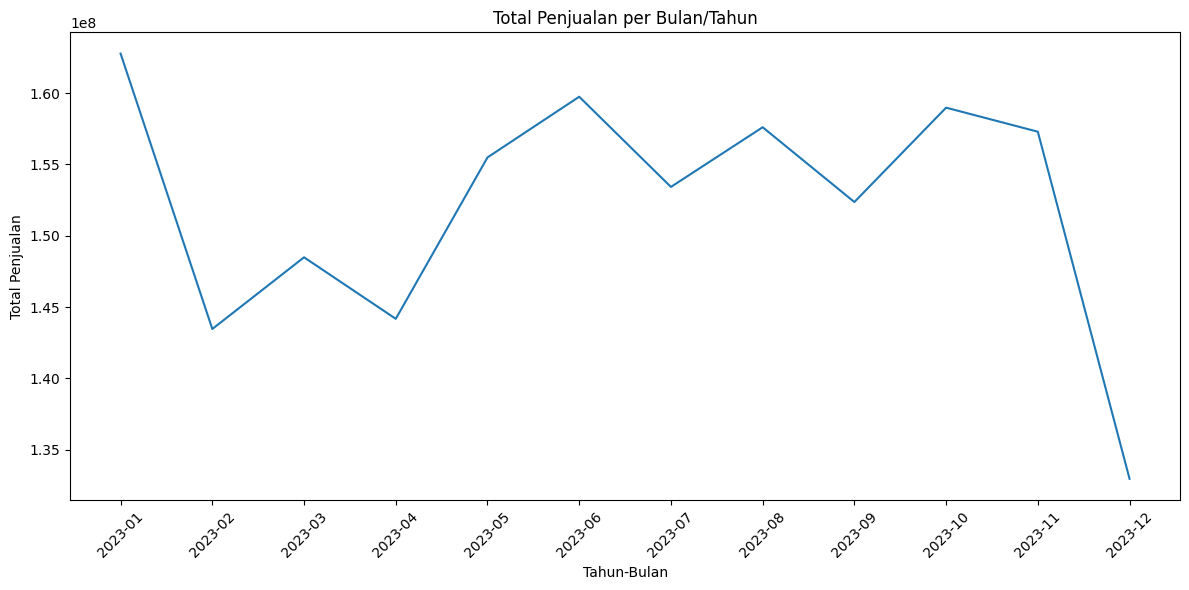

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine year and month for plotting
monthly_sales['tahun_bulan'] = monthly_sales['tahun'].astype(str) + '-' + monthly_sales['bulan'].astype(str).str.zfill(2)

# Sort by year and month to ensure correct plotting order
monthly_sales = monthly_sales.sort_values(by='tahun_bulan')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='tahun_bulan', y='total_harga')
plt.title('Total Penjualan per Bulan/Tahun')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis Penjualan per Perusahaan

In [28]:
# Group by company and sum total_harga to find sales performance per company
company_sales = merged_df.groupby(['id_perusahaan', 'nama_perusahaan'])['total_harga'].sum().reset_index()

# Sort by total_harga in descending order
best_performing_companies = company_sales.sort_values(by='total_harga', ascending=False)

# Display the results
print("Performa Penjualan per Perusahaan (berdasarkan Total Penjualan):")
display(best_performing_companies)

Performa Penjualan per Perusahaan (berdasarkan Total Penjualan):


,id_perusahaan,nama_perusahaan,total_harga
26,27,Perusahaan Kuliner 27,96624411
35,36,Perusahaan Kuliner 36,70156227
9,10,Perusahaan Kuliner 10,67911595
39,40,Perusahaan Kuliner 40,66959477
28,29,Perusahaan Kuliner 29,65573815
19,20,Perusahaan Kuliner 20,63213589
14,15,Perusahaan Kuliner 15,61800046
8,9,Perusahaan Kuliner 9,61554864
42,43,Perusahaan Kuliner 43,60456695
40,41,Perusahaan Kuliner 41,54887418


## Analisis Penjualan per Kategori Produk

In [29]:
# Group by product category and sum total_harga
category_sales = merged_df.groupby('kategori')['total_harga'].sum().reset_index()

# Sort by total_harga in descending order
best_performing_categories = category_sales.sort_values(by='total_harga', ascending=False)

# Display the results
print("Performa Penjualan per Kategori Produk (berdasarkan Total Penjualan):")
display(best_performing_categories)

Performa Penjualan per Kategori Produk (berdasarkan Total Penjualan):


,kategori,total_harga
1,Makanan Berat,707616455
2,Makanan Ringan,590434587
0,Desserts,298773885
3,Minuman,229938588


## Analisis Karakteristik Pelanggan Terbanyak Bertransaksi (berdasarkan Total Pengeluaran)

In [32]:
# Group by customer and sum total_harga to find top customers by revenue
customer_sales = merged_df.groupby(['id_pelanggan', 'nama'])['total_harga'].sum().reset_index()

# Sort by total_harga in descending order
top_customers_by_revenue = customer_sales.sort_values(by='total_harga', ascending=False)

# Display the top 10 customers by total revenue
print("10 Pelanggan dengan Total Pengeluaran Terbanyak:")
display(top_customers_by_revenue.head(10))

# Now, let's look at the characteristics of these top customers
# Merge the top customers data with the original Pelanggan dataframe to get characteristics
# We can use the already merged_df or merge with the original 'Pelanggan' dataframe if preferred
# Using merged_df is simpler as the customer info is already there

# Get the id_pelanggan of the top customers
top_customer_ids = top_customers_by_revenue['id_pelanggan'].head(10).tolist()

# Filter the merged_df to get transactions only for these top customers
top_customers_df = merged_df[merged_df['id_pelanggan'].isin(top_customer_ids)]

# Now, let's look at the characteristics of these top customers from the filtered dataframe
print("\nKarakteristik 10 Pelanggan dengan Total Pengeluaran Terbanyak:")

# Select relevant characteristic columns and drop duplicates to show unique characteristics per customer
customer_characteristics = top_customers_df[['id_pelanggan', 'nama', 'jenis_kelamin', 'tanggal_lahir', 'kota_transaksi', 'provinsi']].drop_duplicates(subset=['id_pelanggan'])

display(customer_characteristics)

10 Pelanggan dengan Total Pengeluaran Terbanyak:


,id_pelanggan,nama,total_harga
1799,1823,Customer 1823,4246606
462,469,Customer 469,3247917
446,453,Customer 453,3167944
983,996,Customer 996,3098035
1011,1024,Customer 1024,3076942
645,655,Customer 655,3055676
437,444,Customer 444,2995408
200,205,Customer 205,2945854
53,55,Customer 55,2875010
1220,1238,Customer 1238,2838145



Karakteristik 10 Pelanggan dengan Total Pengeluaran Terbanyak:


,id_pelanggan,nama,jenis_kelamin,tanggal_lahir,kota_transaksi,provinsi
10,453,Customer 453,Perempuan,1993-10-02,Semarang,DI Yogyakarta
294,1823,Customer 1823,Laki-laki,1989-12-01,Yogyakarta,Sumatera Utara
494,655,Customer 655,Laki-laki,1961-10-28,Jakarta,Sumatera Utara
554,469,Customer 469,Perempuan,1985-10-25,Jakarta,Sumatera Utara
1446,444,Customer 444,Lainnya,1942-03-13,Makassar,Sulawesi Selatan
1491,1238,Customer 1238,Lainnya,1990-12-23,Makassar,DI Yogyakarta
1496,55,Customer 55,Laki-laki,2004-04-27,Makassar,Sulawesi Selatan
2383,996,Customer 996,Lainnya,2004-07-23,Semarang,DI Yogyakarta
2554,205,Customer 205,Laki-laki,1973-02-12,Surabaya,Sumatera Utara
3172,1024,Customer 1024,Laki-laki,1972-01-18,Jakarta,Sulawesi Selatan


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Ringkasan Wawasan Bisnis Utama

Berdasarkan analisis data penjualan yang **telah saya lakukan**, berikut adalah beberapa wawasan bisnis utama:

1.  **Tren Penjualan per Waktu**: Dari visualisasi total penjualan per bulan/tahun, **saya** dapat mengamati tren penjualan dari waktu ke waktu. **Terlihat adanya fluktuasi penjualan bulanan sepanjang tahun 2023. Penjualan mencapai puncaknya di awal tahun (Januari) dan menurun di akhir tahun (Desember). Ada juga beberapa puncak dan lembah di antara bulan-bulan tersebut, menunjukkan adanya pola musiman atau faktor lain yang mempengaruhi penjualan.**
2.  **Produk Terlaris**: **Saya** telah mengidentifikasi 10 produk teratas berdasarkan total penjualan. Produk-produk ini adalah kontributor pendapatan terbesar, dengan **'Produk 286 Lezat', 'Produk 145 Lezat', dan 'Produk 82 Segar'** berada di posisi teratas. Produk-produk ini mungkin layak mendapat perhatian khusus dalam strategi pemasaran, promosi, atau manajemen stok.
3.  **Performa Penjualan per Perusahaan**: Analisis menunjukkan performa penjualan yang bervariasi antar perusahaan. **'Perusahaan Kuliner 27'** menunjukkan performa penjualan terbaik dengan total pendapatan tertinggi, diikuti oleh **'Perusahaan Kuliner 36' dan 'Perusahaan Kuliner 10'**. Informasi ini dapat digunakan untuk mengevaluasi kemitraan, mengidentifikasi praktik terbaik dari perusahaan berkinerja tinggi, atau fokus pada peningkatan penjualan dari perusahaan yang berkinerja lebih rendah.
4.  **Performa Penjualan per Kategori Produk**: **Saya** melihat kategori produk mana yang paling populer dan menghasilkan pendapatan terbesar. **'Makanan Berat'** adalah kategori dengan penjualan tertinggi, diikuti oleh **'Makanan Ringan'**. Kategori **'Desserts' dan 'Minuman'** memiliki kontribusi pendapatan yang lebih rendah. Ini membantu dalam alokasi sumber daya, strategi pengembangan produk, dan upaya pemasaran yang ditargetkan untuk kategori yang berbeda.
5.  **Karakteristik Pelanggan Teratas**: Analisis karakteristik 10 pelanggan dengan pengeluaran terbanyak memberikan gambaran demografis atau geografis tentang siapa pelanggan paling berharga. Pelanggan-pelanggan ini tersebar di berbagai kota dan provinsi seperti **Semarang, Yogyakarta, Jakarta, Makassar, dan Sumatera Utara**, dengan berbagai jenis kelamin dan rentang usia (berdasarkan tahun lahir). Wawasan ini bisa digunakan untuk strategi retensi pelanggan yang dipersonalisasi atau kampanye pemasaran yang ditargetkan berdasarkan demografi dan lokasi pelanggan bernilai tinggi.

Dengan wawasan yang lebih rinci ini, bisnis dapat membuat keputusan yang lebih terinformasi terkait strategi produk, pemasaran, penjualan, dan pengelolaan hubungan pelanggan untuk mengoptimalkan performa.